# Steam store and Video game Sales Data

In [134]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

This helps J. Notebook turn things into graphs.

In [149]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)

In [150]:
saved_style_state = matplotlib.rcParams.copy() #gives a style state to go back to

This is just reading the files to use.

In [151]:
steam_data = pd.read_csv("steam-200k.csv")
print("done")

done


In [152]:
vg_sales = pd.read_csv("vgsales-12-4-2019.csv")
vg_sales = vg_sales.replace(np.NaN, 0)
print("done")

done


# Video Game Data Set

# Top 10 Ranked video games

In [153]:
#Taking the top 10 from Ranked games.
vg_sales.head(10)["Name"]

0                            Wii Sports
1                     Super Mario Bros.
2                        Mario Kart Wii
3         PlayerUnknown's Battlegrounds
4                     Wii Sports Resort
5    Pokemon Red / Green / Blue Version
6                 New Super Mario Bros.
7                                Tetris
8             New Super Mario Bros. Wii
9                             Minecraft
Name: Name, dtype: object

# Critic Scores for the Video Game Data set

What is an amazing score?

We will define an amazing score as one greater than or equal to the overall average.

In [154]:
#Taking the average of the critic scores.
vg_sales["Critic_Score"].mean()

0.8450817321479832

The high average in the critic score suggests high enjoyment of many games overall.

The critic scores of the top 10 ranked video games
shows that best sold doesn't always mean best game

C:\Users\ninte\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


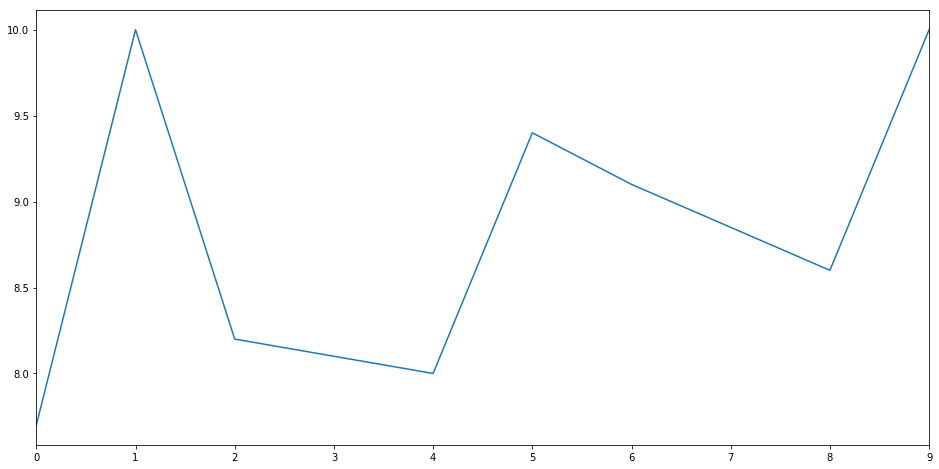

In [155]:
Top10GamesCS = vg_sales[["Critic_Score", "Name"]].head(10)[vg_sales["Critic_Score"] > 0]
Top10GamesCS.Critic_Score.plot(kind = "line");

C:\Users\ninte\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


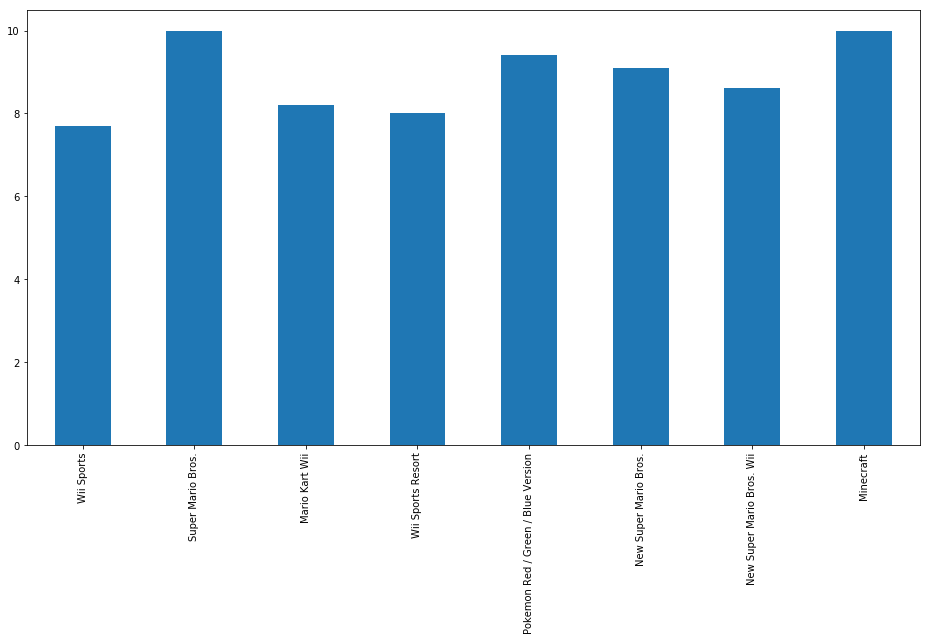

In [156]:
Top10GamesCS = vg_sales[["Critic_Score", "Name"]].head(10)[vg_sales["Critic_Score"] > 0] # Gets top 10 games that were Critic rated
Top10GamesCS.Critic_Score.plot(kind = "bar").set_xticklabels(Top10GamesCS.Name);#x axis ticks set to the Name of the game.

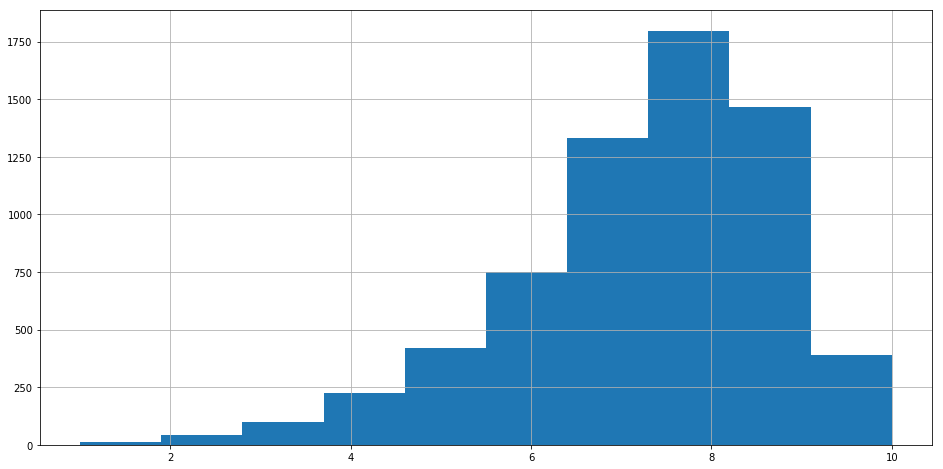

In [157]:
#histogram to show the spread of critic scores
vg_sales["Critic_Score"][vg_sales["Critic_Score"] > 0].hist();

How many units were sold by the top 10 video games?

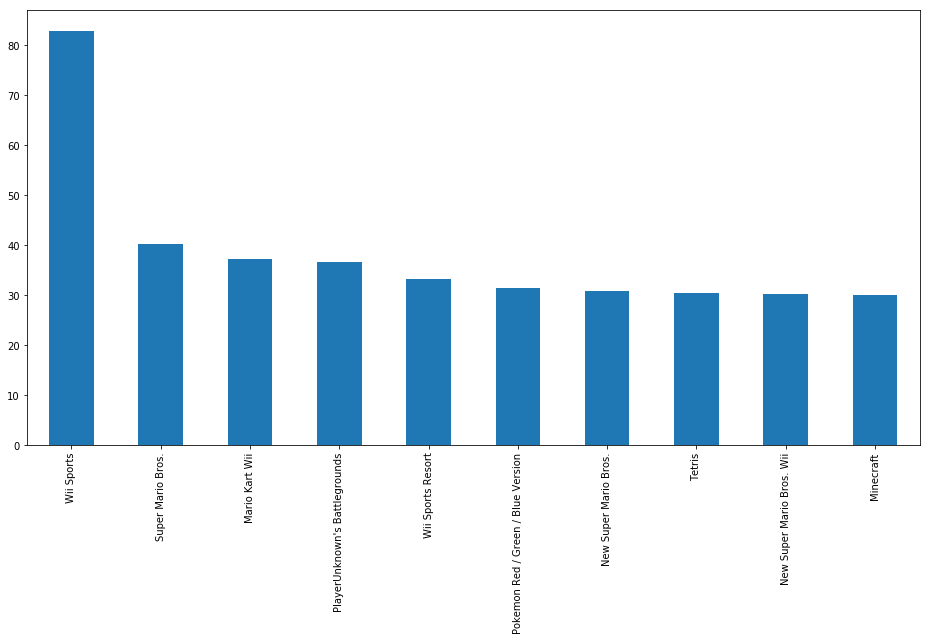

In [158]:
top10 = vg_sales.head(10)#Getting the top 10
top10[["Name", "Total_Shipped"]]#Getting Name and Total Shipped for top 10
ax = top10.Total_Shipped.plot(kind = "bar")#Make it a bar graph and set x axis to Names
ax.set_xticklabels(top10.Name);

8/10 of the top 10 games game from Nintendo, thus Nintendo has been successful in creating well rated and bought video games.

The Wii was increadibly successful console with multiple wii games in the top 10

Wii sports sold over 80 million units!

# Video games which got a Critic Score of 10

Amount of Games with score of 10 (including collectors editions):

Many Games Scored 10 arent even near the top!

In [159]:
# Games that got critic score of 10 by index
vg_sales["Critic_Score"][vg_sales["Critic_Score"] > 9.9]

1        10.0
9        10.0
73       10.0
79       10.0
106      10.0
289      10.0
989      10.0
1246     10.0
1340     10.0
1509     10.0
1991     10.0
2133     10.0
31543    10.0
42730    10.0
48215    10.0
48498    10.0
53703    10.0
Name: Critic_Score, dtype: float64

Top sold doesnt always mean best game

It goes from 17 indexes to 15 results because there was duplicates data for collectors editions
That data was redundant as it showed the same information

In [160]:
from operator import itemgetter 
full_list = vg_sales["Name"]#Full list of Names
index_of_10 = [1, 9, 73, 79, 106, 289, 989, 1246, 1340, 1509, 1991, 2133, 31543, 42730, 48215, 48498, 53703]#17 unique index numbers from critic scores which were 10
final = itemgetter(*index_of_10)(full_list)#Getting the Games scored 10
from collections import OrderedDict
list(OrderedDict.fromkeys(final))#Getting rid of any duplicate data, left with 15 items, meaning there was duplicate data - This is due to collectors editions

['Super Mario Bros.',
 'Minecraft',
 'Grand Theft Auto IV',
 'Super Mario Kart',
 'The Legend of Zelda: A Link to the Past',
 'Dragon Quest XI: Echoes of an Elusive Age',
 'Final Fantasy II',
 'The Legend of Zelda: Breath of the Wild',
 'Final Fight',
 'Red Dead Redemption: Undead Nightmare',
 'Fusion: Genesis',
 'Renegade Ops',
 'The gamrReview Test Game',
 "The Legend of Zelda Collector's Edition",
 'Forza Horizon 4']

# Critic score trends

[Text(0, 0.5, 'Amount of that score'), Text(0.5, 0, 'Score')]

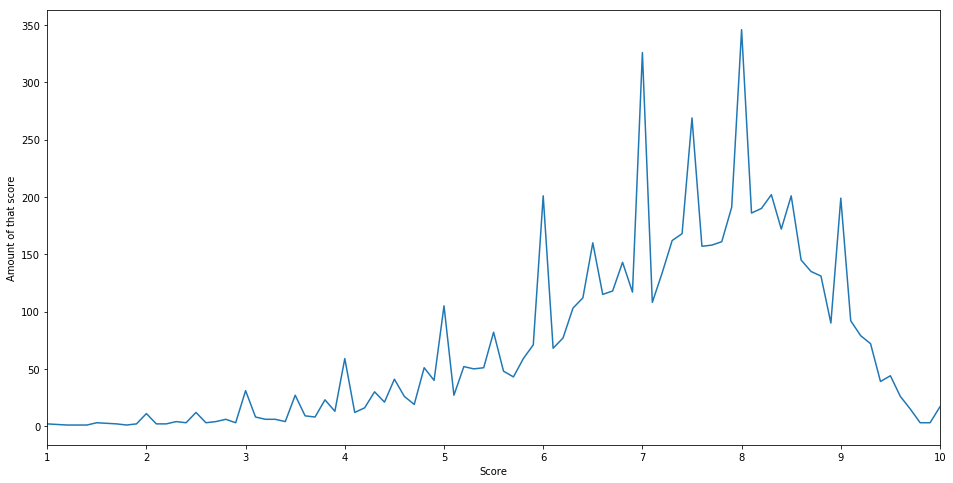

In [161]:
RatedScores = vg_sales["Critic_Score"][vg_sales["Critic_Score"] > 0]
Plot = RatedScores.value_counts().sort_index().plot(kind="line");
Plot.set(xlabel="Score", ylabel="Amount of that score")

Who are the 10 the most frequent Developers in the top 1000 video games?

[Text(0, 0.5, 'Amount of Games in top 1000'), Text(0.5, 0, 'Game Developer')]

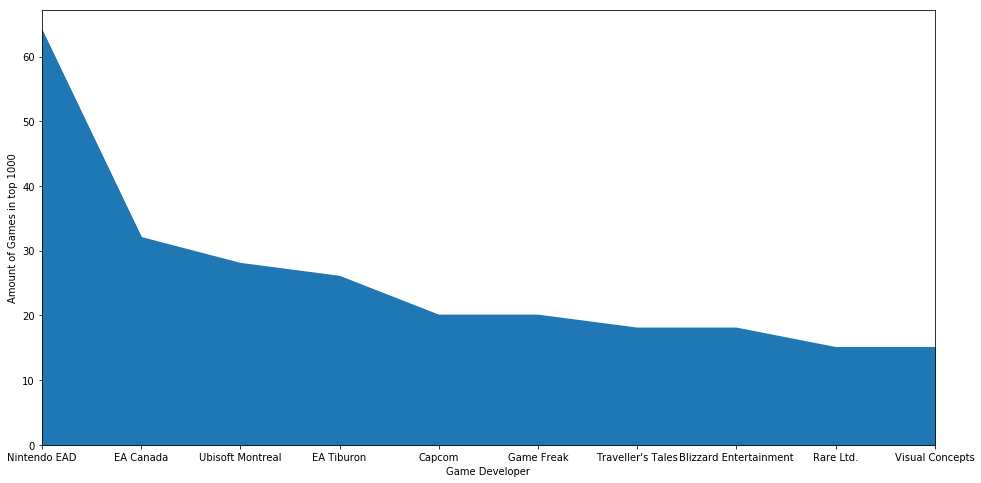

In [162]:
DevSales = vg_sales["Developer"].head(1000).value_counts().head(10).plot(kind = "area")
DevSales.set(xlabel="Game Developer", ylabel="Amount of Games in top 1000")

What are the top 10 most developed for consoles in the top 1000 video games?

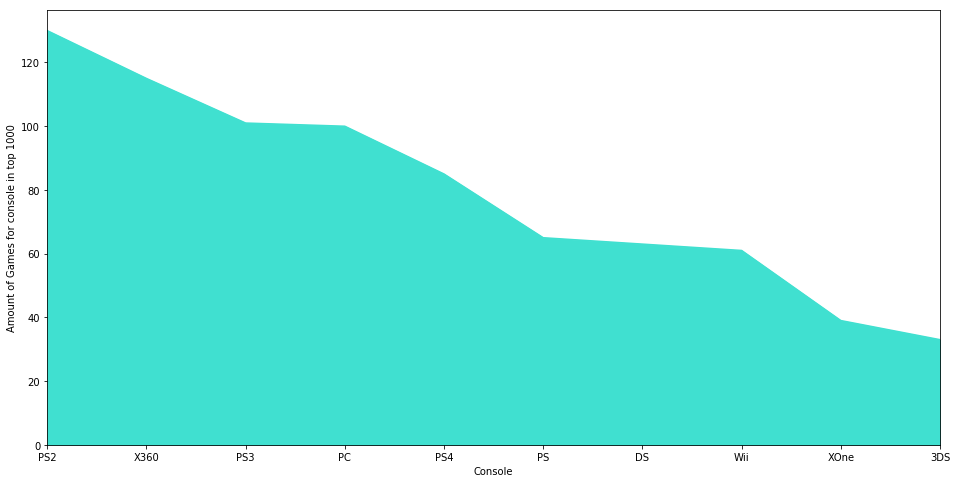

In [174]:
PlatSales = vg_sales["Platform"].head(1000).value_counts().head(10).plot(kind = "area", color = "turquoise");
PlatSales.set(xlabel="Console", ylabel="Amount of Games for console in top 1000");

Graph of top 10 Highest Ranked video games for 2019 and their shippings:

In [164]:
vg_sales[vg_sales["Year"] == 2019].head(10)

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
2101,2102,Slay the Spire,slay-the-spire,Strategy,0,PC,Mega Crit Games,Mega Crit Games,0.0,0.0,...,0.0,0.0,0.00,0.0,2019.0,24th Mar 19,http://www.vgchartz.com/game/223397/slay-the-s...,1,0.0,/games/boxart/full_6635497AmericaFrontccc.jpg
2931,2932,Yokai Watch 3: Sukiyaki,yokai-watch-3-sukiyaki,Role-Playing,0,3DS,Nintendo,Level 5,0.0,0.0,...,0.0,0.0,0.81,0.0,2019.0,09th Sep 18,http://www.vgchartz.com/game/150228/yokai-watc...,1,0.0,/games/boxart/full_5630199JapanFrontccc.jpg
5836,5837,Shovel Knight,shovel-knight,Platform,0,NS,Yacht Club Games,Yacht Club Games,0.0,9.0,...,0.0,0.0,0.00,0.0,2019.0,28th Jan 19,http://www.vgchartz.com/game/220222/shovel-kni...,1,0.0,/games/boxart/full_3473087AmericaFrontccc.jpg
7708,7709,My Time At Portia,my-time-at-portia,Simulation,0,PC,Team17 Digital Ltd,Pathea Games,0.0,0.0,...,0.0,0.0,0.00,0.0,2019.0,16th Feb 19,http://www.vgchartz.com/game/223608/my-time-at...,1,0.0,/games/boxart/full_2612074AmericaFrontccc.jpg
8380,8381,Judgment,judgment,Action-Adventure,M,PS4,Sega,Sega,0.0,0.0,...,0.0,0.0,0.22,0.0,2019.0,05th Apr 19,http://www.vgchartz.com/game/223191/judgment/?...,1,0.0,/games/boxart/full_498665AmericaFrontccc.jpg
9145,9146,God Eater 3,god-eater-3,Role-Playing,T,PS4,Bandai Namco Entertainment,Bandai Namco Studios,0.0,0.0,...,0.0,0.0,0.19,0.0,2019.0,19th Dec 18,http://www.vgchartz.com/game/221674/god-eater-...,1,0.0,/games/boxart/full_3162842AmericaFrontccc.jpg
10409,10410,Dragon Quest Builders 2,dragon-quest-builders-2,Adventure,RP,PS4,Square Enix,Square Enix,0.0,0.0,...,0.0,0.0,0.15,0.0,2019.0,06th Apr 19,http://www.vgchartz.com/game/223265/dragon-que...,1,0.0,/games/boxart/full_5174837JapanFrontccc.jpg
10589,10590,Dragon Quest Builders 2,dragon-quest-builders-2,Adventure,RP,NS,Square Enix,Square Enix,0.0,0.0,...,0.0,0.0,0.14,0.0,2019.0,06th Apr 19,http://www.vgchartz.com/game/223266/dragon-que...,1,0.0,/games/boxart/full_7693631JapanFrontccc.jpg
11381,11382,Saru! Get You! Million Monkeys,saru-get-you-million-monkeys,Platform,0,PS2,Sony Computer Entertainment,SCEI,0.0,0.0,...,0.0,0.0,0.12,0.0,2019.0,18th Sep 18,http://www.vgchartz.com/game/2849/saru-get-you...,1,0.0,/games/boxart/full_7986023JapanFrontccc.jpg
11385,11386,Fate/Extella Link,fate,Action,T,PS4,Xseed Games,Marvelous,0.0,0.0,...,0.0,0.0,0.12,0.0,2019.0,30th Dec 18,http://www.vgchartz.com/game/222148/fateextell...,1,0.0,/games/boxart/full_6596722AmericaFrontccc.jpg


# Steam Data Set

The highest Playtime someone had on one of these video games for steam:

In [165]:
#Highest Played time
MaxHours = max(steam_data["Hours Played"])
#The data that matches time played
steam_data[steam_data["Hours Played"] == MaxHours]

,Steam ID,Video Game,Played/Purchased,Hours Played
123726,73017395,Sid Meier's Civilization V,play,11754.0


On Steam, there are people who put much more hours into games which aren't the best.

The highest playtime for a game on steam (collectively):

In [166]:
#Sorting it to give a row of Video Games and Hours Played
OnlyPlayed = steam_data[["Video Game", "Hours Played"]]
#Sorting it to only find the collective hours of games played
OP = OnlyPlayed[OnlyPlayed["Hours Played"] != 1]
#When Added
Added = OP.groupby("Video Game").sum()
Added.sort_values(by="Hours Played", ascending=False).head(10)

,Hours Played
Video Game,
Dota 2,981599.6
Counter-Strike Global Offensive,322762.6
Team Fortress 2,173629.3
Counter-Strike,134254.1
Sid Meier's Civilization V,99819.3
Counter-Strike Source,96070.5
The Elder Scrolls V Skyrim,70886.3
Garry's Mod,49721.3
Call of Duty Modern Warfare 2 - Multiplayer,42007.9


Average Hours Played for all games.

This will serve as a base to see how popular a video game on steam is among others.

In [167]:
#Hours Played Average
steam_data["Hours Played"].mean()

17.874384000000475

Only a select few are played for huge amounts of hours.

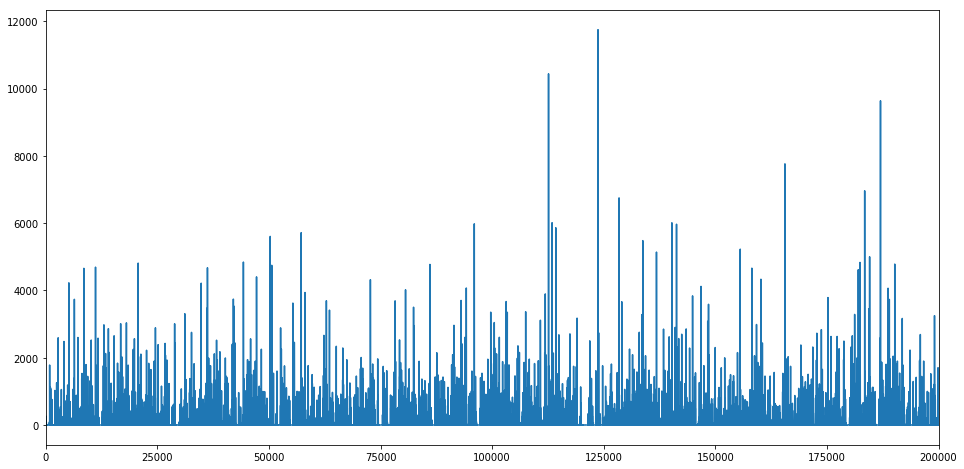

In [168]:
steam_data["Hours Played"].plot();

Purchased vs Played

We can see that more games have been purchased than played, this may be due to people buying bundles of games on steam or due to buying a game for future use.

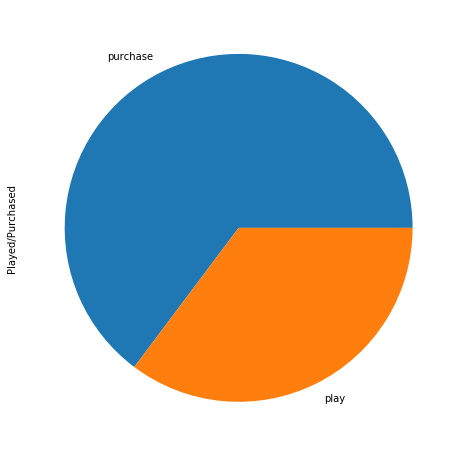

In [169]:
#Pie Chart for Purchased vs Played
steam_data["Played/Purchased"].value_counts().plot(kind = "pie");

Below we can see that many games don't get much play time before people move onto the next.

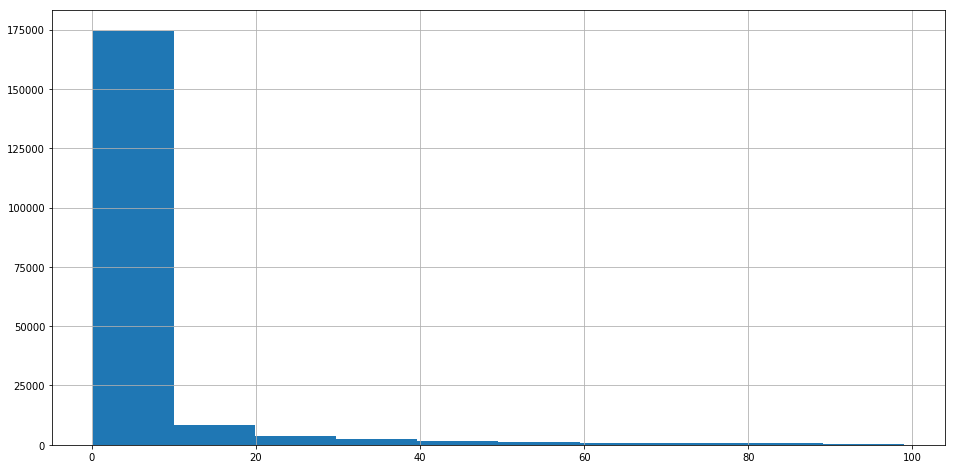

In [170]:
steam_data["Hours Played"][steam_data["Hours Played"] < 100].hist();

In comparison to the other dataset, people aren't as pleased as play time getting much play time is small for a large portion of steam.

Top 10 Most Bought Games in Steam

In [171]:
#Top 10 most bought
steam_data["Video Game"].value_counts().head(10)

Dota 2                             9682
Team Fortress 2                    4646
Counter-Strike Global Offensive    2789
Unturned                           2632
Left 4 Dead 2                      1752
Counter-Strike Source              1693
Counter-Strike                     1424
Garry's Mod                        1397
The Elder Scrolls V Skyrim         1394
Warframe                           1271
Name: Video Game, dtype: int64

The most played game on steam (Dota 2) collectively has more than double of the Player count than the second most played game (Team Fortress 2)

Graph displaying the portions of people who have played a top 10 game.

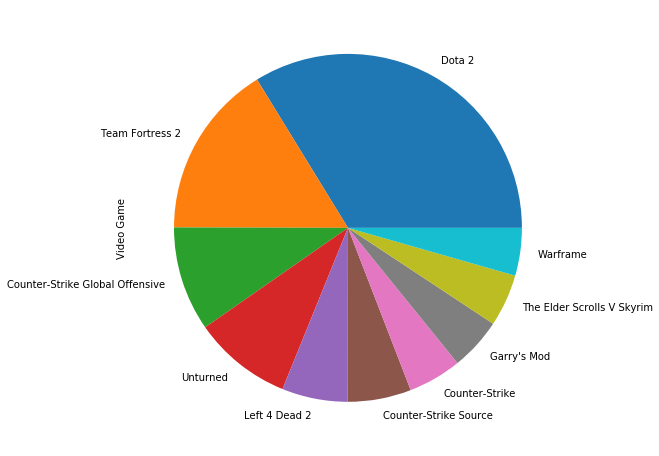

In [172]:
#Top 10 video Games
steam_data["Video Game"].value_counts().head(10).plot(kind = "pie")

# _End of Presentation_